#       STEP:1  Importing the libraries

In [55]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split # as its important to train and test data 
from sklearn.linear_model import LogisticRegression # importing linear model for logistic regression, one of the model we are using
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics # this module implements several loss, score, and utility functions to measure classification performance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# There are 400 images- (40 people- 1 person has 10 image )  1 Image=64*64 pixel

In [56]:
olivetti_data = fetch_olivetti_faces()

# There are 40 people ( 1 person has 10 images)  so total 10x40=400 images and 1 image = 64x64 pixels
features = olivetti_data.data

# we represent target variables (people) with integers (face ids)
targets = olivetti_data.target

# Features= 400 rows and 64*64=4096 features ; Normalized values 1-d array 

In [57]:
print(features.shape)
print(features)

(400, 4096)
[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


# we represent the Target (people) with integer face ids and 400 rows. 

In [58]:
print(targets)

print(f'\n{targets.shape}')    # 1 person= 10 image = 40*10=400 images

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

# STEP2: VISUALIZE

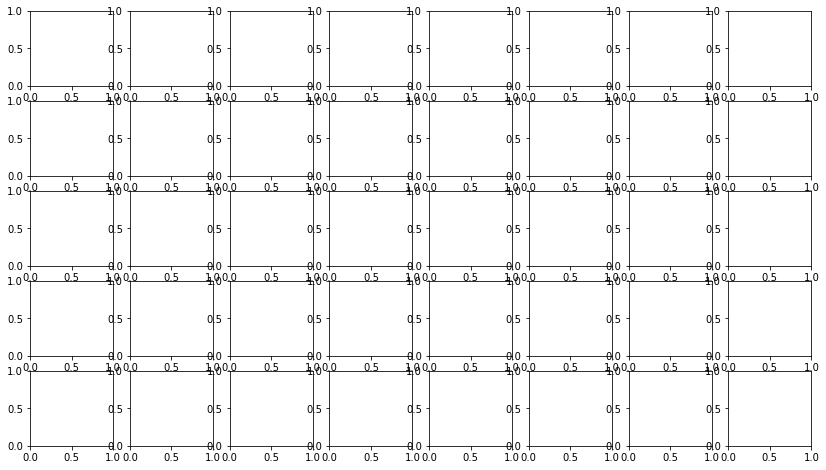

In [59]:
fig,sub_plots= plt.subplots(nrows=5,ncols=8,figsize=(14,8))
#print(sub_plots) # 2d array we have to convert it into 1-d ( use flatten() ) 

In [1]:
# sub_plots=sub_plots.flatten()
# print(sub_plots)

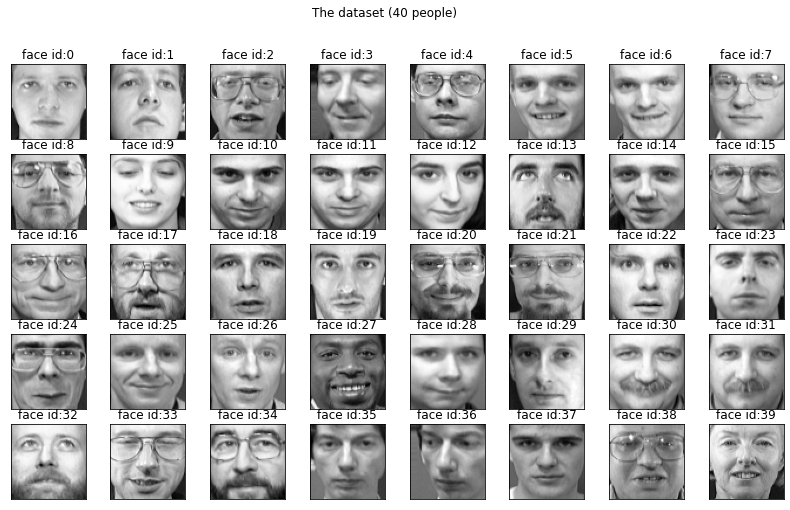

39


In [71]:
fig,sub_plots= plt.subplots(nrows=5,ncols=8,figsize=(14,8))
sub_plots=sub_plots.flatten()

for unique_user_id in np.unique(targets):
    image_index= unique_user_id*8
    sub_plots[unique_user_id].imshow(features[image_index].reshape(64,64), cmap='gray')
    sub_plots[unique_user_id].set_xticks([])
    sub_plots[unique_user_id].set_yticks([])
    sub_plots[unique_user_id].set_title('face id:%s' % unique_user_id)
plt.suptitle("The dataset (40 people)")
plt.show()
print(unique_user_id)

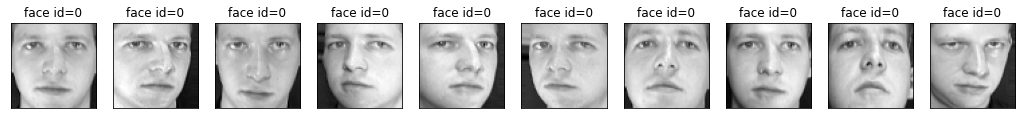

In [70]:
fig,sub_plots= plt.subplots(nrows=1,ncols=10,figsize=(18,9))

for j in range(10):
    
    sub_plots[j].imshow(features[j].reshape(64,64), cmap='gray')
    sub_plots[j].set_xticks([])
    sub_plots[j].set_yticks([])
    sub_plots[j].set_title('face id=0')

plt.show()

# step 3 : Train and test the data and reduce the data using pca  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, stratify=targets, random_state=0)


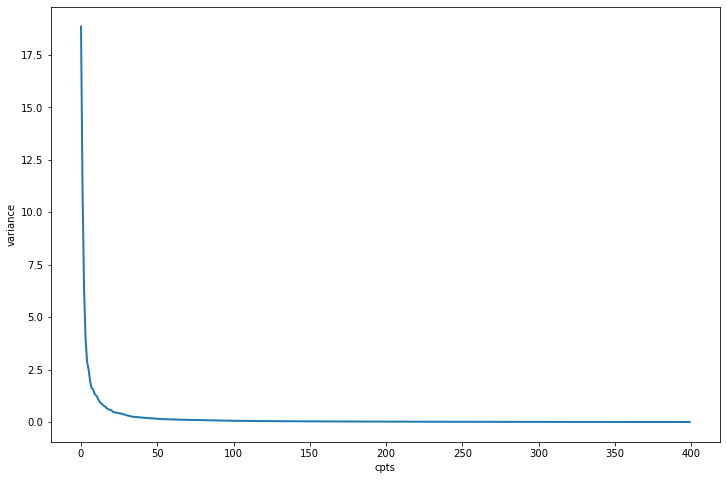

In [64]:
# let's try to find the optimal number of eigenvectors (principle components)
pca = PCA()
pca.fit(features)
plt.figure(1,figsize=(12,8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Componenets')
plt.ylabel('Variance')
plt.show()

In [78]:
pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)
X_pca = pca.fit_transform(features)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))
print(f'Number of eigenface: {number_of_eigenfaces}')

matrix=np.cov(X_train)
print(f'\nCovariant matrix= {matrix}')
matrix.shape

print(f'\nLen of cov matrix: {len(matrix)}')

print(f'\nMean: {np.mean(X_train)}')



100


<Figure size 432x288 with 0 Axes>

# Step 4: Eigen faces 

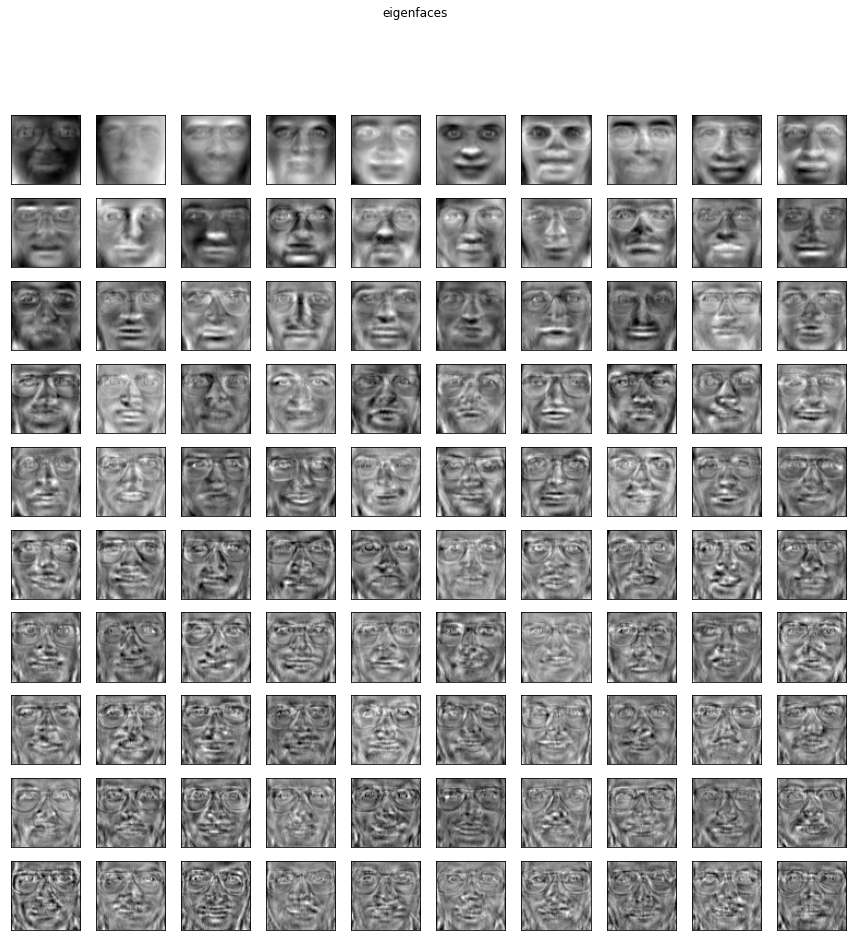

In [79]:
fig,sub_plots= plt.subplots(nrows=10,ncols=10,figsize=(15,15))
sub_plots =sub_plots.flatten()

for i in range(number_of_eigenfaces):
    
    sub_plots[i].imshow(eigen_faces[i], cmap='gray')
    sub_plots[i].set_xticks([])
    sub_plots[i].set_yticks([])
    
plt.suptitle("eigenfaces")
plt.show()



# step 5: Accuracy prediction  

In [120]:
models = [("Logistic Regression", LogisticRegression()), ("Support Vector Machine", SVC()), ("Naive Bayes Classifier", GaussianNB())]

for name, model in models:

  classifier_model=model
  classifier_model.fit(X_train_pca, y_train)
  y_predicted=classifier_model.predict(X_test_pca)

  print("Results with %s:" % name,)
  print("ACCURACY SCORE:%s\n" % (metrics.accuracy_score(y_test, y_predicted)*100) )

# cm_display = metrics.confusion_matrix(y_test, y_predicted)

# print(cm_display)


Results with Logistic Regression:
ACCURACY SCORE:89.0

Results with Support Vector Machine:
ACCURACY SCORE:94.0

Results with Naive Bayes Classifier:
ACCURACY SCORE:86.0



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_model, X_test_pca, y_test)  
plt.show()